In [1]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

## Create necessary classes and functions

Create class to handle "cities"

In [2]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

Create a fitness function

In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

## Create our initial population

Route generator

In [4]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

Create first "population" (list of routes)

In [5]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    print(population)
    return population

## Create the genetic algorithm

Rank individuals

In [6]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

Create a selection function that will be used to make the list of parent routes

In [7]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

Create mating pool

In [8]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

Create a crossover function for two parents to create one child

In [9]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

Create function to run crossover over full mating pool

In [10]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

Create function to mutate a single route

In [11]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

Create function to run mutation over entire population

In [12]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

Put all steps together to create the next generation

In [13]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

Final step: create the genetic algorithm

In [14]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

## Running the genetic algorithm

Create list of cities

In [15]:
cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

Run the genetic algorithm

In [16]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

[[(161,103), (109,154), (192,136), (4,187), (116,110), (170,90), (198,68), (15,147), (133,61), (66,180), (114,143), (78,69), (178,21), (150,198), (74,97), (158,40), (158,20), (24,119), (93,162), (26,86), (126,135), (102,31), (55,29), (141,199), (164,68)], [(150,198), (74,97), (116,110), (133,61), (55,29), (109,154), (78,69), (192,136), (198,68), (126,135), (170,90), (66,180), (93,162), (15,147), (161,103), (4,187), (178,21), (114,143), (141,199), (158,40), (24,119), (158,20), (26,86), (102,31), (164,68)], [(170,90), (158,20), (78,69), (126,135), (178,21), (116,110), (74,97), (24,119), (133,61), (164,68), (150,198), (161,103), (55,29), (114,143), (198,68), (4,187), (93,162), (141,199), (192,136), (102,31), (15,147), (109,154), (158,40), (66,180), (26,86)], [(66,180), (109,154), (26,86), (24,119), (126,135), (102,31), (141,199), (161,103), (133,61), (170,90), (74,97), (15,147), (192,136), (4,187), (116,110), (198,68), (164,68), (78,69), (93,162), (178,21), (150,198), (114,143), (158,40),

[(170,90),
 (161,103),
 (192,136),
 (150,198),
 (141,199),
 (126,135),
 (116,110),
 (114,143),
 (109,154),
 (93,162),
 (66,180),
 (4,187),
 (15,147),
 (24,119),
 (26,86),
 (74,97),
 (78,69),
 (55,29),
 (102,31),
 (133,61),
 (158,40),
 (158,20),
 (178,21),
 (198,68),
 (164,68)]

## Plot the progress

Note, this will win run a separate GA

In [17]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

Run the function with our assumptions to see how distance has improved in each generation

[[(24,119), (158,40), (116,110), (114,143), (141,199), (4,187), (161,103), (66,180), (158,20), (133,61), (93,162), (192,136), (178,21), (126,135), (164,68), (74,97), (170,90), (102,31), (26,86), (198,68), (150,198), (78,69), (109,154), (55,29), (15,147)], [(133,61), (178,21), (4,187), (55,29), (109,154), (161,103), (170,90), (24,119), (158,20), (78,69), (26,86), (116,110), (192,136), (74,97), (158,40), (126,135), (102,31), (66,180), (15,147), (141,199), (164,68), (93,162), (150,198), (198,68), (114,143)], [(15,147), (133,61), (170,90), (109,154), (161,103), (4,187), (158,20), (26,86), (24,119), (126,135), (141,199), (192,136), (102,31), (198,68), (114,143), (150,198), (55,29), (74,97), (164,68), (66,180), (178,21), (78,69), (116,110), (93,162), (158,40)], [(4,187), (158,40), (198,68), (93,162), (133,61), (102,31), (141,199), (26,86), (66,180), (178,21), (24,119), (150,198), (116,110), (114,143), (15,147), (164,68), (170,90), (74,97), (161,103), (109,154), (158,20), (192,136), (78,69), 

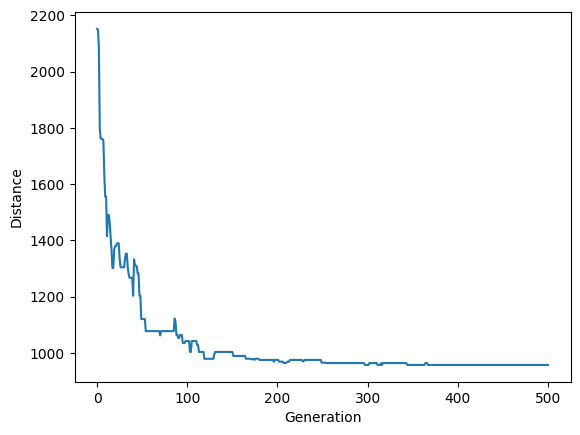

In [18]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)